<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Ejercicios_simulaci%C3%B3n_SyS_nov_16/Punto_6.ipynb/Punto_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejercicio**

6. Repital el punto 5 para el caso lazo cerrado, con A(s) = 1 en lazo de realimentación.

# **Demostración matemática**

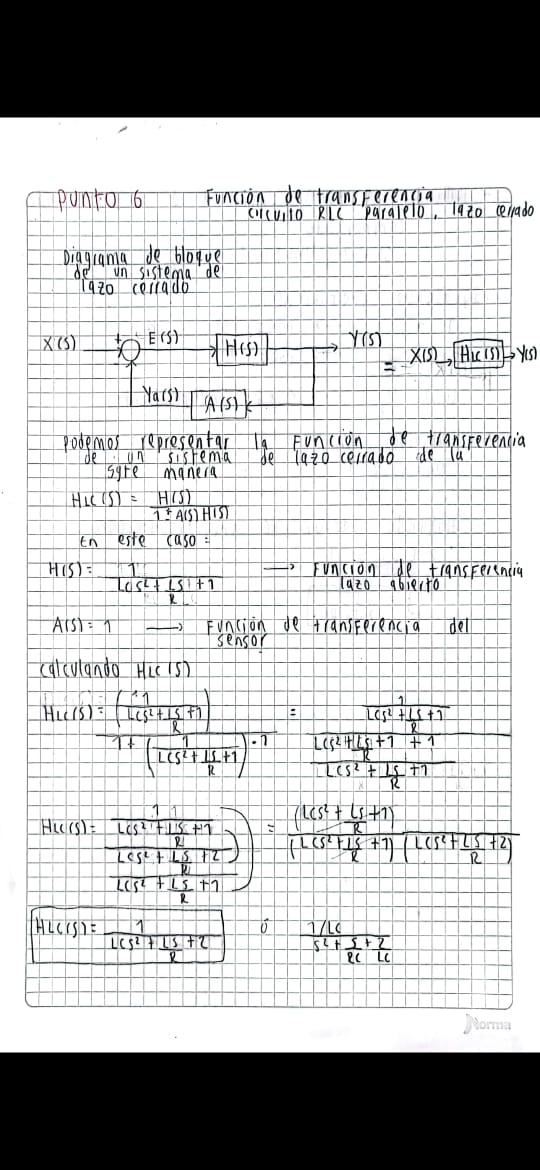

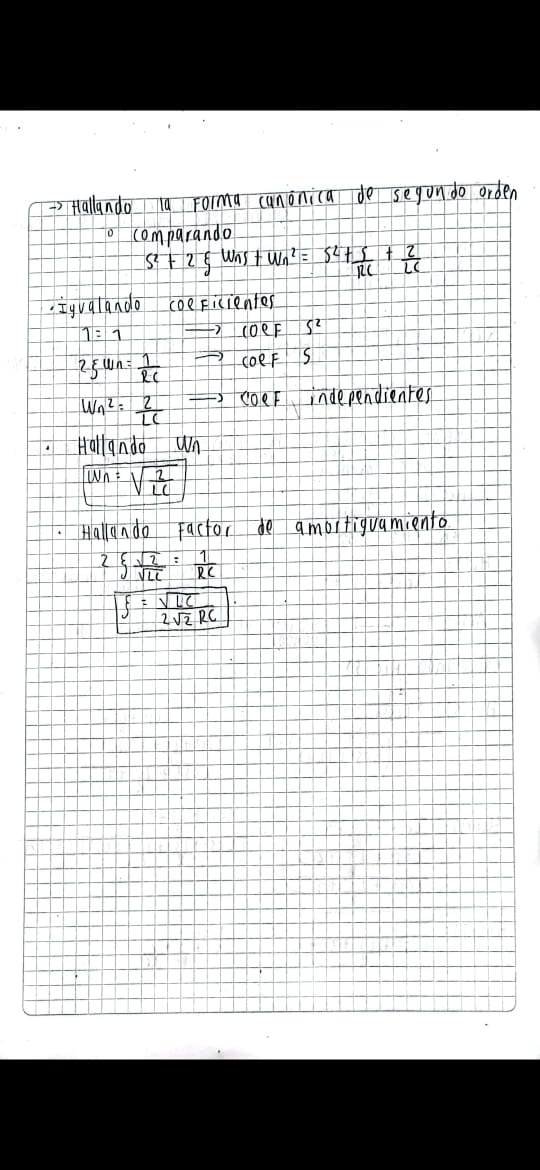

#**Simulación**

#**Circuito RLC paralelo lazo cerrado**








*   Salida ante una entrada escalón



In [ ]:
import sympy as sym
import sympy.physics.control as control
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C, = sym.symbols('t R L C ', positive=True)
#Entrada de interés en Laplace
X = 1/s # Ajustar según tipo de entrada
Hlc=control.TransferFunction(1,(L*C)*s**2 + (L*s)/R + 2,s) #Funcion de transferencia con la API de control
Y = Hlc.num * X /Hlc.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

         1          
────────────────────
  ⎛     2   L⋅s    ⎞
s⋅⎜C⋅L⋅s  + ─── + 2⎟
  ⎝          R     ⎠

In [ ]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

       L⋅(C⋅R⋅s + 1)          1 
- ──────────────────────── + ───
    ⎛       2            ⎞   2⋅s
  2⋅⎝C⋅L⋅R⋅s  + L⋅s + 2⋅R⎠      


*   Respuesta subamortiguada

  0 < $\xi$ <1



In [ ]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: 1, C: 1}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

        -t               -t           
        ───              ───          
         2     ⎛√7⋅t⎞     2     ⎛√7⋅t⎞
    √7⋅ℯ   ⋅sin⎜────⎟   ℯ   ⋅cos⎜────⎟
1              ⎝ 2  ⎠           ⎝ 2  ⎠
─ - ───────────────── - ──────────────
2           14                2       

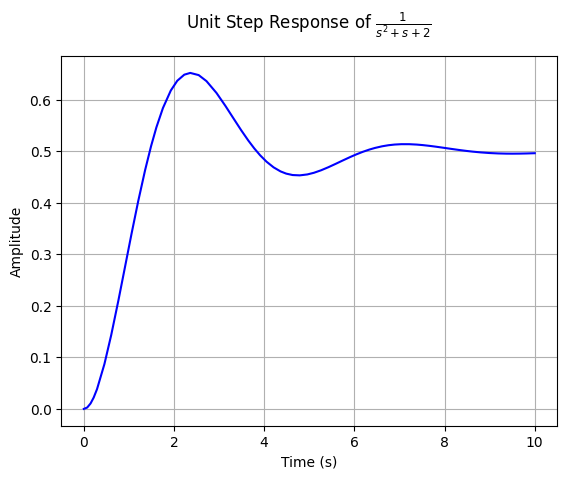

In [ ]:
HRLC=control.TransferFunction(Hlc.num,Hlc.den.subs(RLC),s)
control.step_response_plot(HRLC)

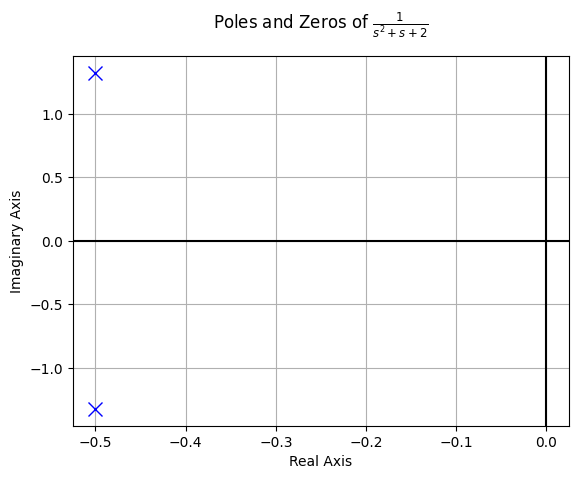

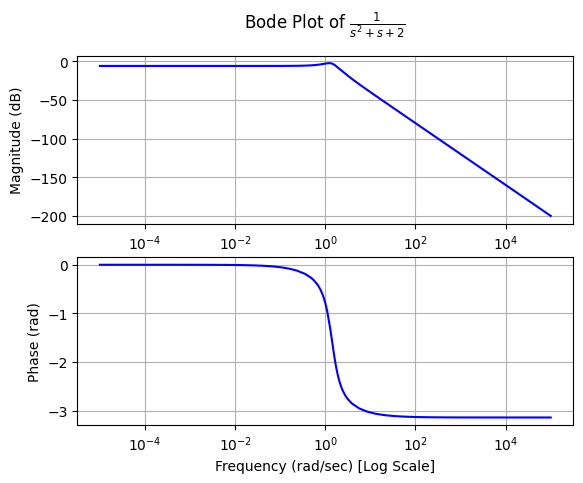

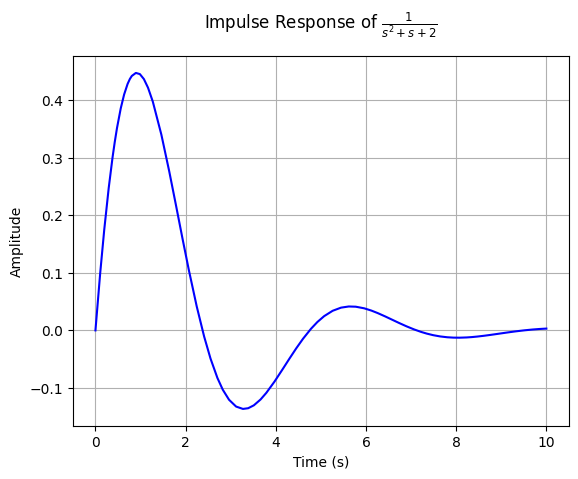

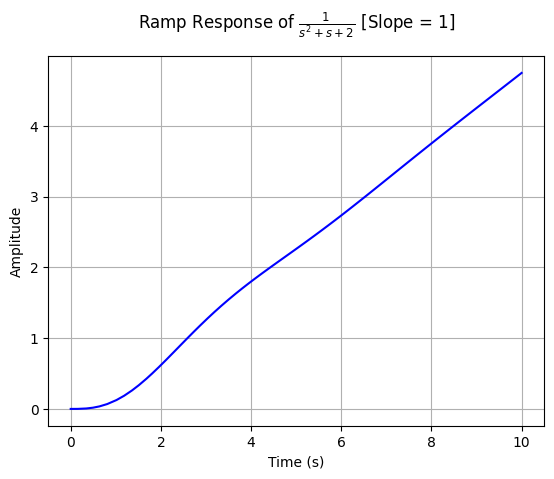

In [ ]:
# Además, se gráfica el diagrama de polos y ceros, diagrama de bode, respuesta impulso y respuesta a rampa
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.ramp_response_plot(HRLC)



*  Respuesta sobreamortiguada

 $\xi$ >1



In [ ]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: 10, C: 1}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

        -t                -t            
        ───               ───           
         2      ⎛√5⋅t⎞     2      ⎛√5⋅t⎞
    √5⋅ℯ   ⋅sinh⎜────⎟   ℯ   ⋅cosh⎜────⎟
1               ⎝ 10 ⎠            ⎝ 10 ⎠
─ - ────────────────── - ───────────────
2           2                   2       

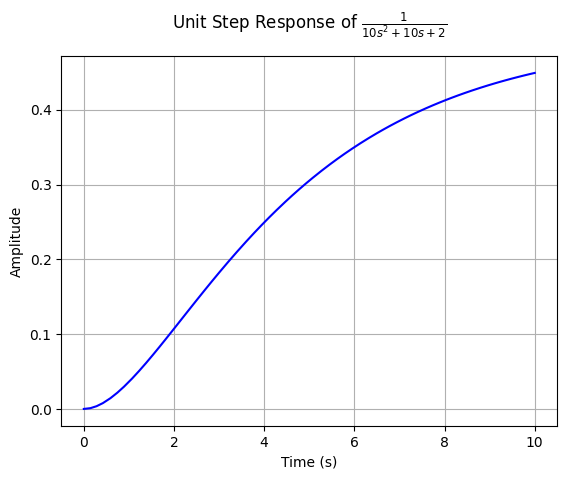

In [ ]:

HRLC=control.TransferFunction(Hlc.num,Hlc.den.subs(RLC),s)
control.step_response_plot(HRLC)

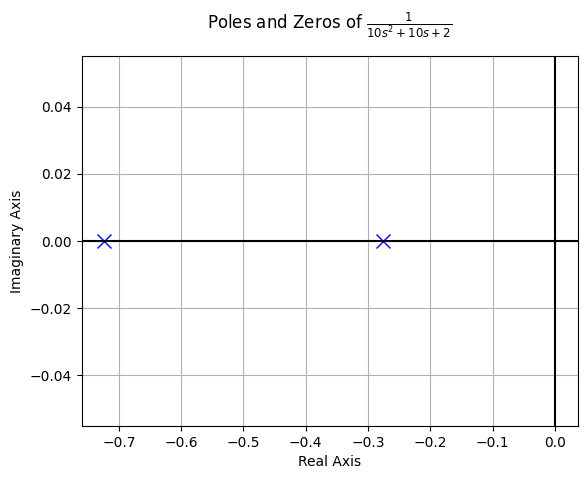

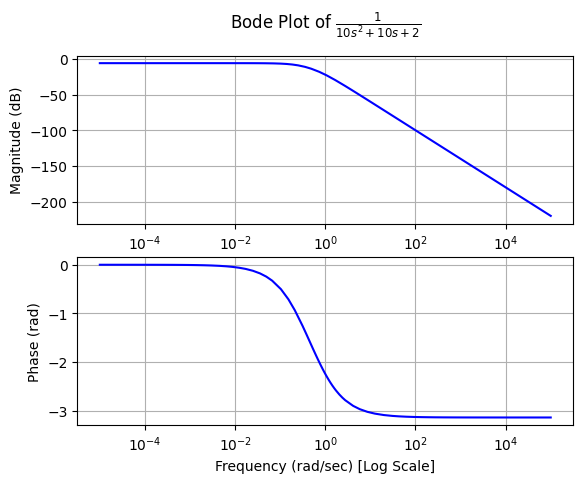

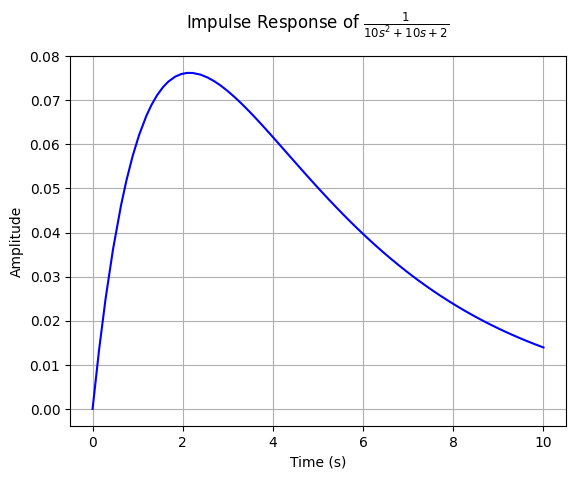

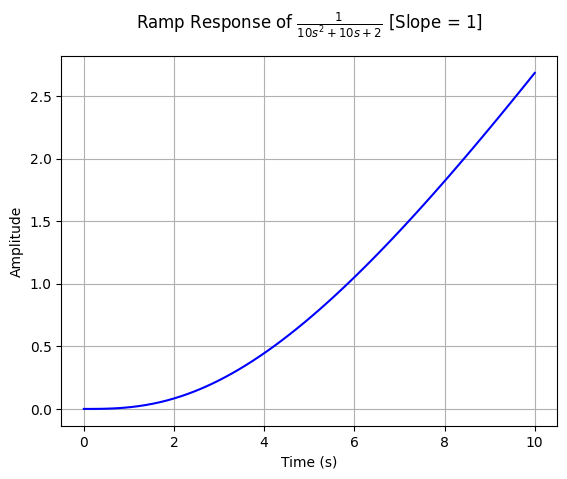

In [ ]:
# Además, se gráfica el diagrama de polos y ceros, diagrama de bode, respuesta impulso y respuesta a rampa
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.ramp_response_plot(HRLC)




*  Respuesta de amortiguamiento crítico

 $\xi$ = 1




In [ ]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 0.5, L: 2, C: 1}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

         -t   1        -t
- 0.5⋅t⋅ℯ   + ─ - 0.5⋅ℯ  
              2          

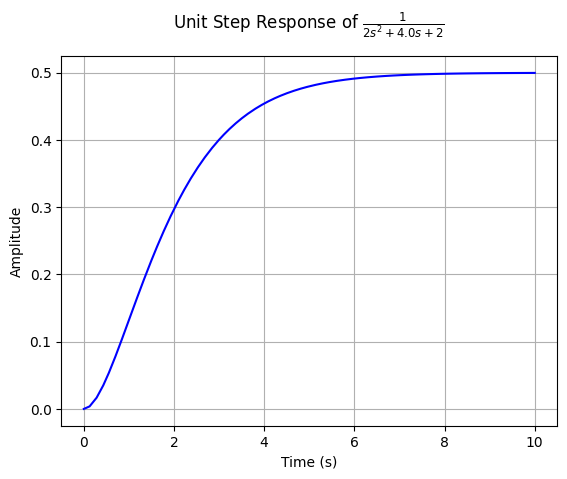

In [ ]:
HRLC=control.TransferFunction(Hlc.num,Hlc.den.subs(RLC),s)
control.step_response_plot(HRLC)

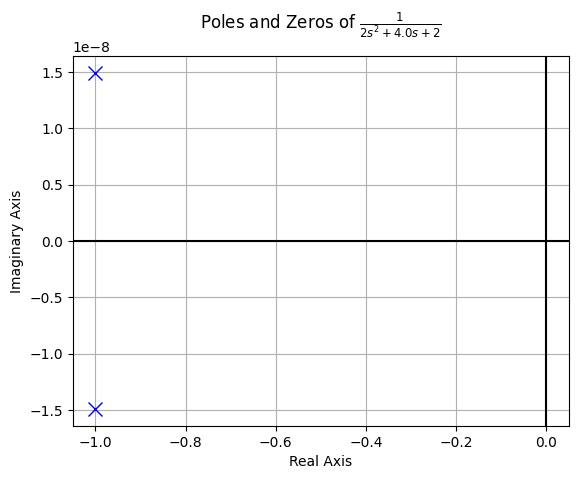

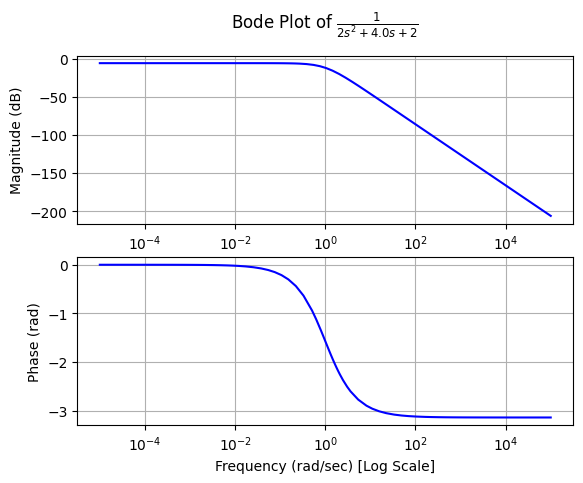

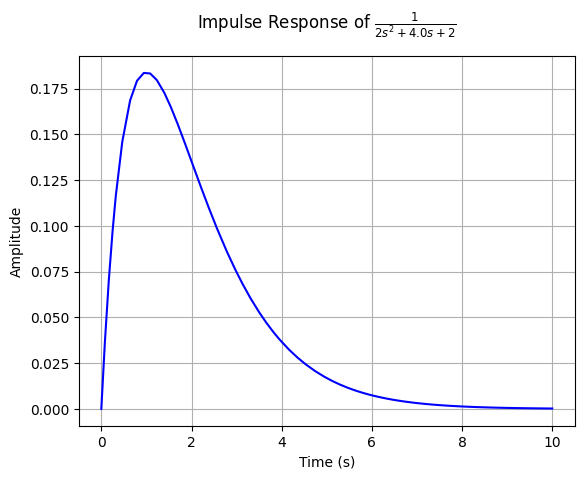

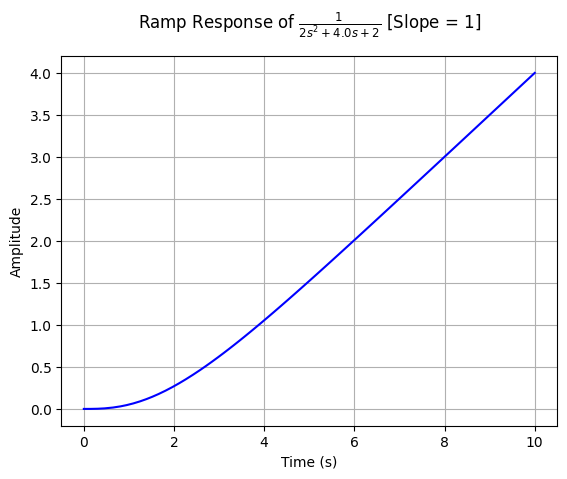

In [ ]:
# Además, se gráfica el diagrama de polos y ceros, diagrama de bode, respuesta impulso y respuesta a rampa
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.ramp_response_plot(HRLC)




*   Respuesta inestable

$\xi$ < 0




In [ ]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: -0.5, L: 2, C: 1}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

       t        t   1
0.5⋅t⋅ℯ  - 0.5⋅ℯ  + ─
                    2

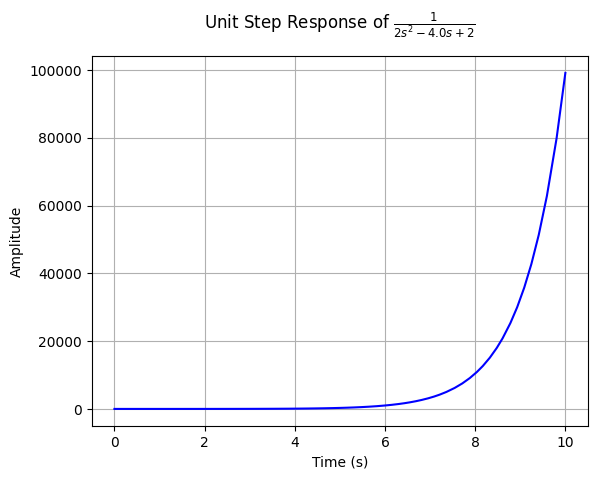

In [ ]:
HRLC=control.TransferFunction(Hlc.num,Hlc.den.subs(RLC),s)
control.step_response_plot(HRLC)

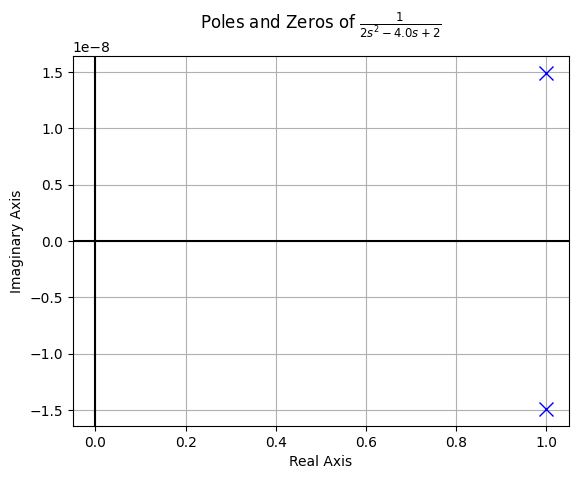

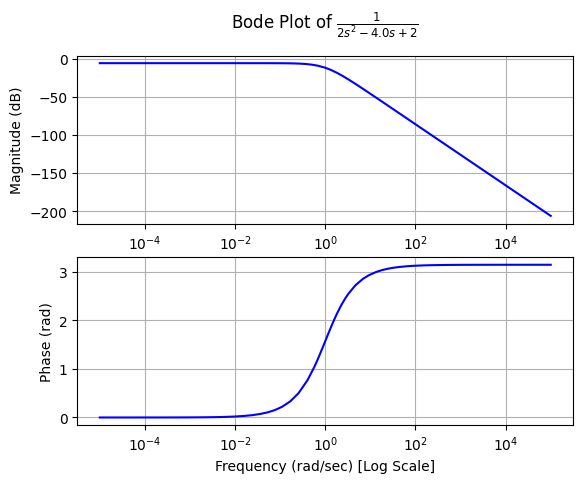

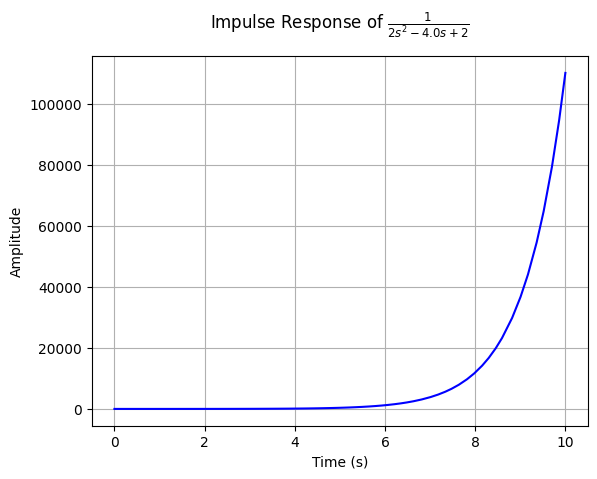

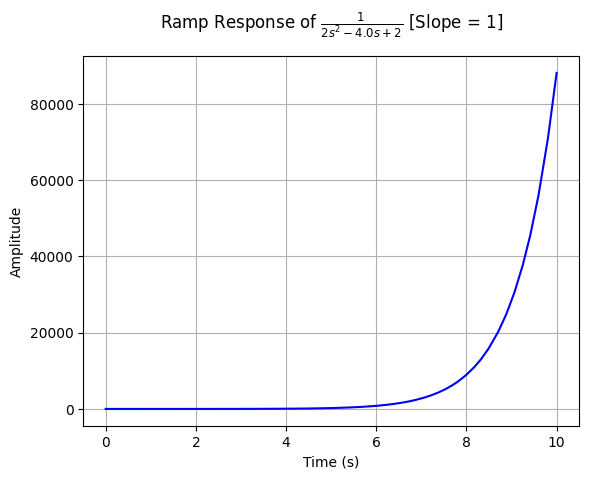

In [ ]:
# Además, se gráfica el diagrama de polos y ceros, diagrama de bode, respuesta impulso y respuesta a rampa
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.ramp_response_plot(HRLC)


*   Respuesta oscilatoria

$\xi$ = 0

In [ ]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 10, L: 0, C: 1}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

1

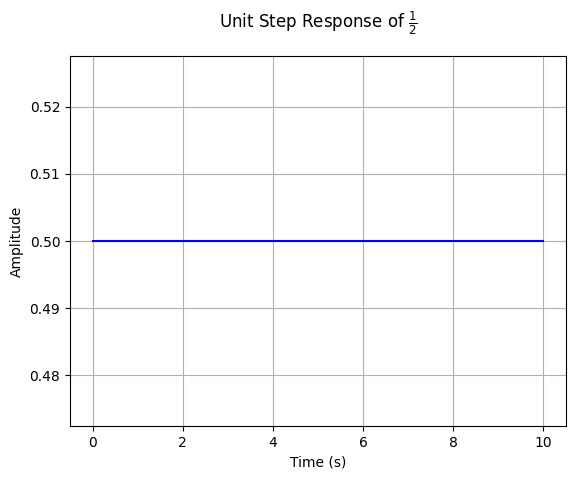

In [ ]:
HRLC=control.TransferFunction(Hlc.num,Hlc.den.subs(RLC),s)
control.step_response_plot(HRLC)

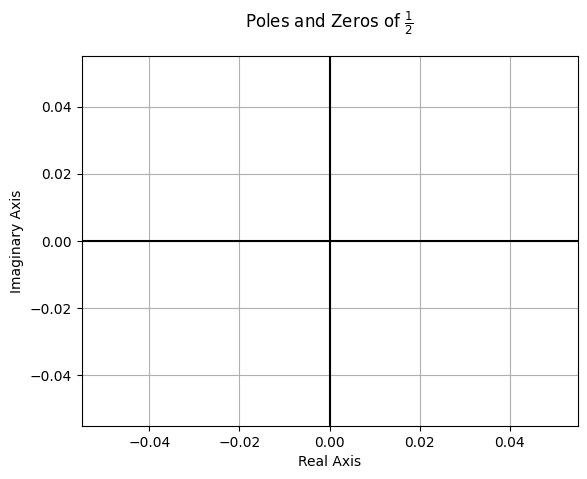

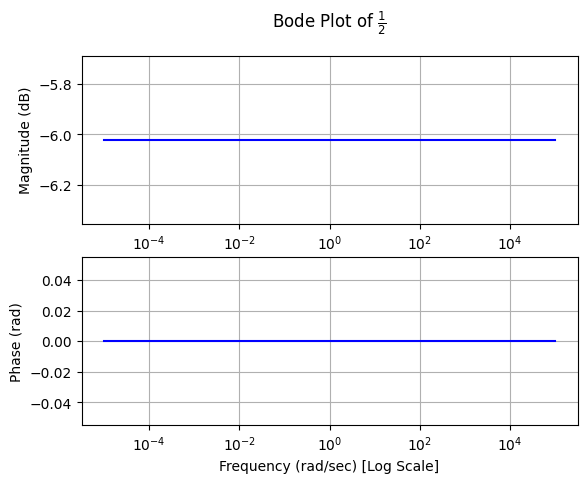

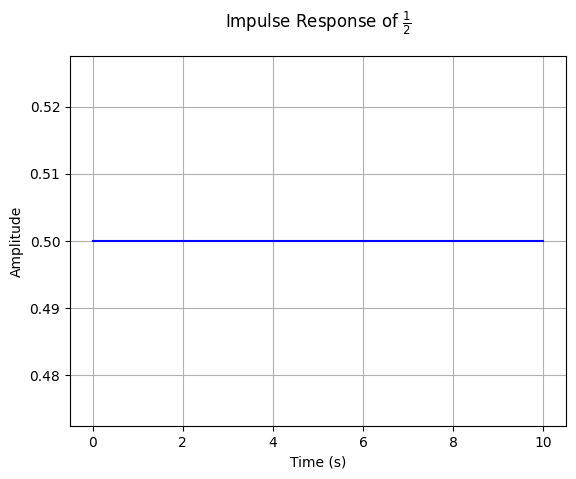

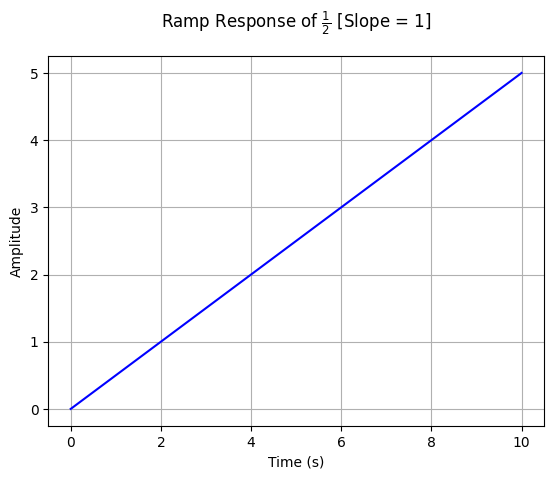

In [ ]:
# Además, se gráfica el diagrama de polos y ceros, diagrama de bode, respuesta impulso y respuesta a rampa
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.ramp_response_plot(HRLC)